In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [3]:
import os
print(os.getcwd())  # Displays current working directory


/content


In [10]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart (1).csv


In [12]:
import os
print(os.listdir('/content'))  # Lists the files in the content folder


['.config', 'heart (1).csv', 'heart.csv', 'sample_data']


In [ ]:
print(df.head())  # Display the first few rows of the DataFrame


In [ ]:
df = pd.read_csv('/content/heart.csv')
print(df)  # This will display the entire DataFrame



In [29]:
X = df.drop(columns=["target"]) #Data Preprocessing
y = df["target"]







In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Ensure that the results dictionary is initialized
results = {}

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict the results
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy in the results dictionary
    results[name] = accuracy

    # Print the classification report for each model
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))

# Sort the results by accuracy
sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))

# Accuracy Comparison Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=list(sorted_results.keys()), y=list(sorted_results.values()), palette="viridis")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(sorted_results.keys()), y=list(sorted_results.values()), palette="viridis")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()


In [ ]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()


In [ ]:
importances = best_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[sorted_idx], y=[feature_names[i] for i in sorted_idx], palette="mako")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="coolwarm")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.title("Distribution of Target Classes")
plt.xticks([0, 1], ["No Disease", "Disease"])
plt.show()


In [ ]:
important_features = df[["age", "thalach", "chol", "oldpeak", "target"]]
sns.pairplot(important_features, hue="target", palette="husl")
plt.show()


In [42]:
class HeartDiseaseNN(nn.Module):
    def __init__(self):
        super(HeartDiseaseNN, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 16)
        self.layer2 = nn.Linear(16, 8)
        self.layer3 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x


In [ ]:
# Convert data to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Initialize the model, loss function, and optimizer
model = HeartDiseaseNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the Neural Network and track the loss
epochs = 100
loss_values = []

for epoch in range(epochs):
    optimizer.zero_grad()  # Clear the previous gradients
    outputs = model(X_train_torch)  # Forward pass
    loss = criterion(outputs, y_train_torch)  # Calculate the loss
    loss.backward()  # Backward pass (calculate gradients)
    optimizer.step()  # Update the model parameters

    loss_values.append(loss.item())  # Track the loss for visualization

    # Print the loss at every 10th epoch
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Plot the loss curve to see the progress
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), loss_values, color='red', label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve for PyTorch Neural Network")
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), loss_values, color='red', label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve for PyTorch Neural Network")
plt.legend()
plt.show()


In [ ]:
# Make predictions with the trained Random Forest model
y_pred_best = best_model.predict(X_test)

# Show the first 10 predictions
print(f"Predictions: {y_pred_best[:10]}")

# You can also display the predicted class (0 = No Disease, 1 = Disease)
for i in range(10):
    if y_pred_best[i] == 1:
        print(f"Patient {i+1} has the disease.")
    else:
        print(f"Patient {i+1} does not have the disease.")


In [ ]:
# Predict probabilities for Random Forest
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability for class 1 (disease)

# Show probabilities for the first 10 predictions
print(f"Probabilities: {y_pred_proba[:10]}")

# Threshold the probabilities to make a classification decision
threshold = 0.5  # Classify as disease if probability > 0.5
y_pred_class = (y_pred_proba > threshold).astype(int)

# Display classification
for i in range(10):
    if y_pred_class[i] == 1:
        print(f"Patient {i+1} has the disease (Probability: {y_pred_proba[i]:.2f}).")
    else:
        print(f"Patient {i+1} does not have the disease (Probability: {y_pred_proba[i]:.2f}).")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'target' column represents heart attack presence (1 = Yes, 0 = No)
# Read the data
df = pd.read_csv('/content/heart.csv')

# Inspect the data
print(df.head())

# If 'target' column indicates heart attack (1 = heart attack, 0 = no heart attack)
heart_attack_data = df[df['target'] == 1]

# Count how many people had heart attacks and group by different features
mortality_count_by_age = heart_attack_data.groupby('age')['target'].count()

# Visualize
plt.figure(figsize=(10, 6))
mortality_count_by_age.plot(kind='bar', color='skyblue')
plt.title('Number of Heart Attacks by Age')
plt.xlabel('Age')
plt.ylabel('Number of Heart Attacks')
plt.show()

# Additional analysis can be done to relate heart attack to other features, e.g. cholesterol, blood pressure, etc.


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the heart disease dataset
df = pd.read_csv('/content/heart.csv')  # Replace with the correct path

# Features and target
X = df.drop(columns=["target"])
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Feature importance to identify which features impact heart disease the most
feature_importances = model.feature_importances_
features = X.columns
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Heart Disease')
plt.show()

# Simulate large populations for the years 2025-2030
years = list(range(2025, 2031))

# Initialize an empty dictionary to store predictions for each year
yearly_predictions = {}

# Simulate a large population (e.g., 1 million individuals per year) for each year
for year in years:
    # Generate a large simulated population for the given year (1 million individuals)
    # We use random values in a similar distribution as the dataset columns
    simulated_data = np.random.rand(1000000, X.shape[1]) * np.ptp(X.values, axis=0) + np.min(X.values, axis=0)

    # Normalize the simulated data
    simulated_data_scaled = scaler.transform(simulated_data)

    # Predict heart disease status for the simulated population
    predictions = model.predict(simulated_data_scaled)

    # Count how many people are predicted to have heart disease (i.e., how many 1's)
    heart_disease_count = np.sum(predictions)

    # Store the result in the dictionary
    yearly_predictions[year] = heart_disease_count

# Output the results for each year
for year, count in yearly_predictions.items():
    print(f"Predicted number of people with heart disease in {year}: {count} people")


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the heart disease dataset
df = pd.read_csv('/content/heart.csv')  # Replace with the correct path

# Features and target
X = df.drop(columns=["target"])
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Feature importance to identify which features impact heart disease the most
feature_importances = model.feature_importances_
features = X.columns

# Identify people who have heart disease (target == 1)
heart_disease_people = X_test[y_test == 1]

# Initialize a dictionary to count the most common contributing features
feature_contribution_count = {feature: 0 for feature in features}

# Iterate through the heart disease people and categorize based on the most important features
for idx, person in heart_disease_people.iterrows():
    # Get the most important feature for each person
    sorted_features = np.argsort(feature_importances)[::-1]  # Sort features by importance
    for feature_idx in sorted_features:
        feature = features[feature_idx]
        # If the person's value for this feature is greater than the median, they are affected by it
        if person[feature] > X[feature].median():
            feature_contribution_count[feature] += 1
            break  # Stop at the first feature that passes the threshold

# Display the most common features contributing to heart disease
sorted_feature_contributions = sorted(feature_contribution_count.items(), key=lambda x: x[1], reverse=True)

print("Most common contributing features to heart disease:")
for feature, count in sorted_feature_contributions:
    if count > 0:
        print(f"{feature}: {count} people")


# Find the highest, average, and smallest affected features
highest_affected_feature = sorted_feature_contributions[0]
average_affected_count = np.mean([count for feature, count in sorted_feature_contributions])
smallest_affected_feature = sorted_feature_contributions[-1]

# Display the results
print(f"Most common contributing features to heart disease:")
print(f"Highest affected feature: {highest_affected_feature[0]} with {highest_affected_feature[1]} people affected.")
print(f"Smallest affected feature: {smallest_affected_feature[0]} with {smallest_affected_feature[1]} people affected.")
print(f"Average affected count across features: {average_affected_count:.2f} people.")

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the heart disease dataset
df = pd.read_csv('/content/heart.csv')  # Replace with the correct path

# Create Physical_Activity_Level based on age, cholesterol, and heart rate
df['Physical_Activity_Level'] = df.apply(
    lambda row: 1 if row['age'] < 40 and row['chol'] < 200 and row['thalach'] > 150 else 0,
    axis=1
)

# Features and target
X = df.drop(columns=["target"])
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Feature importance to identify which features impact heart disease the most
feature_importances = model.feature_importances_
features = X.columns

# Identify people who have heart disease (target == 1)
heart_disease_people = X_test[y_test == 1]

# Categorize them based on the most important features
# Create a dictionary to store the categories
categorized_people = {feature: [] for feature in features}

# Iterate through the heart disease people and categorize based on important features
for idx, person in heart_disease_people.iterrows():
    # Get the most important feature for each person
    sorted_features = np.argsort(feature_importances)[::-1]  # Sort features by importance
    for feature_idx in sorted_features:
        feature = features[feature_idx]
        if person[feature] > X[feature].median():  # Use a threshold based on the median
            categorized_people[feature].append(person.name)
            break  # Stop at the first feature that passes the threshold

# Output the categorized people
for feature, people in categorized_people.items():
    if people:
        print(f"People affected by {feature}: {len(people)} people")

# Example: Show the updated DataFrame with the new feature
print(df[['age', 'chol', 'thalach', 'Physical_Activity_Level']].head())


In [ ]:
import pandas as pd
import numpy as np

# Example synthetic data for weight and height
df['weight_kg'] = np.random.randint(45, 100, size=len(df))  # Random weight between 45-100 kg
df['height_cm'] = np.random.randint(150, 190, size=len(df))  # Random height between 150-190 cm

# Function to categorize BMI
def categorize_bmi(row):
    # Convert height from cm to meters
    height_in_meters = row['height_cm'] / 100
    bmi = row['weight_kg'] / (height_in_meters ** 2)  # BMI formula
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy Weight'
    else:
        return 'Overweight'

# Add BMI category to the dataframe
df['BMI_Category'] = df.apply(categorize_bmi, axis=1)

# Show the result
print(df[['weight_kg', 'height_cm', 'BMI_Category']].head())


In [ ]:
print(df.columns)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the heart disease dataset
df = pd.read_csv('/content/heart.csv')  # Replace with the correct path

# Features and target
X = df.drop(columns=["target"])
y = df["target"]

# Train-test split (we are using the full data here to predict for all patients)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Now use the full dataset for predictions (not just X_test)
X_full = X.copy()  # We use the entire dataset for the simulation

# Simulate Age Progression for 2026 (Increase the age by 1 year)
X_2026 = X_full.copy()
X_2026['age'] = X_2026['age'] + 1  # Age progression by 1 year

# Normalize the 2026 data
X_full_scaled = scaler.transform(X_full)
X_2026_scaled = scaler.transform(X_2026)

# Predict heart disease status for both 2025 (current) and 2026 (future)
y_pred_2025 = model.predict(X_full_scaled)
y_pred_2026 = model.predict(X_2026_scaled)

# Display results for all patients 1-1025 in order
for idx, patient in enumerate(X_full.index):
    print(f"Patient {idx + 1} - 2025 Age: {X_full.loc[patient, 'age']} - Prediction: {'Has Heart Disease' if y_pred_2025[idx] == 1 else 'No Heart Disease'}")
    print(f"Patient {idx + 1} - 2026 Age: {X_2026.loc[patient, 'age']} - Prediction: {'Has Heart Disease' if y_pred_2026[idx] == 1 else 'No Heart Disease'}\n")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the heart disease dataset
df = pd.read_csv('/content/heart.csv')  # Replace with the correct path

# Features and target
X = df.drop(columns=["target"])
y = df["target"]

# Train-test split (we are using the full data here to predict for all patients)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Now use the full dataset for predictions (not just X_test)
X_full = X.copy()  # We use the entire dataset for the simulation

# Simulate Age Progression for 2026 (Increase the age by 1 year)
X_2026 = X_full.copy()
X_2026['age'] = X_2026['age'] + 1  # Age progression by 1 year

# Normalize the 2026 data
X_full_scaled = scaler.transform(X_full)
X_2026_scaled = scaler.transform(X_2026)

# Predict heart disease status for both 2025 (current) and 2026 (future)
y_pred_2025 = model.predict(X_full_scaled)
y_pred_2026 = model.predict(X_2026_scaled)

# Define additional disease categories in the dataset
# Let's assume these are some example disease categories: cp (chest pain), ca (major vessels), fbs (fasting blood sugar), thalach (maximum heart rate achieved)
disease_categories = ['cp', 'ca', 'fbs', 'thalach']

# Display results for all patients 1-1025 in order, including disease category and cause
for idx, patient in enumerate(X_full.index):
    # Get current values for each disease category
    patient_diseases = {disease: X_full.loc[patient, disease] for disease in disease_categories}

    # Simulate how these might change by 2026 (e.g., worsening conditions)
    simulated_diseases_2026 = patient_diseases.copy()

    # Example assumptions for disease progression (you can add more specific logic)
    if patient_diseases['cp'] == 3:  # Severe chest pain might worsen
        simulated_diseases_2026['cp'] = 4
    if patient_diseases['ca'] == 0:  # If no vessels were affected, maybe more vessels are impacted
        simulated_diseases_2026['ca'] = 1
    if patient_diseases['fbs'] == 1:  # If fasting blood sugar is high, it might increase
        simulated_diseases_2026['fbs'] = 2
    if patient_diseases['thalach'] < 120:  # If heart rate max is low, it could get higher with more strain
        simulated_diseases_2026['thalach'] += 10

    # Predict heart disease risk for both 2025 and 2026
    heart_attack_risk_2025 = 'High Risk' if y_pred_2025[idx] == 1 else 'Low Risk'
    heart_attack_risk_2026 = 'High Risk' if y_pred_2026[idx] == 1 else 'Low Risk'

    # Display disease progression and predictions for each patient
    print(f"Patient {idx + 1} - 2025 Age: {X_full.loc[patient, 'age']} - Diseases: {patient_diseases}")
    print(f"Prediction: {'Has Heart Disease' if y_pred_2025[idx] == 1 else 'No Heart Disease'}")
    print(f"Patient {idx + 1} - 2026 Age: {X_2026.loc[patient, 'age']} - Diseases: {simulated_diseases_2026}")
    print(f"Prediction: {'Has Heart Disease' if y_pred_2026[idx] == 1 else 'No Heart Disease'}")
    print(f"Heart Attack Risk in 2025: {heart_attack_risk_2025}")
    print(f"Heart Attack Risk in 2026: {heart_attack_risk_2026}\n")


Model Accuracy: 100.00%


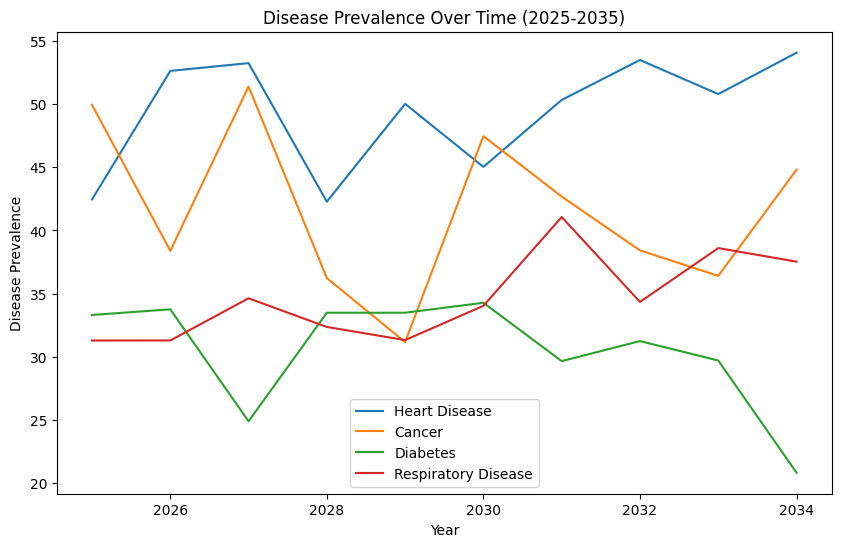

Year 2025: Heart Disease is not the most prevalent
Year 2026: Heart Disease is not the most prevalent
Year 2027: Heart Disease is not the most prevalent
Year 2028: Heart Disease is not the most prevalent
Year 2029: Heart Disease is not the most prevalent
Year 2030: Heart Disease is not the most prevalent
Year 2031: Heart Disease is not the most prevalent
Year 2032: Heart Disease is not the most prevalent
Year 2033: Heart Disease is not the most prevalent
Year 2034: Heart Disease is not the most prevalent


In [80]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Simulating synthetic data for disease prevalence over 30 years (1990 - 2020)
years = np.arange(2025, 2035)
heart_disease_prevalence = np.random.normal(loc=50, scale=5, size=len(years))  # Simulated heart disease prevalence
cancer_prevalence = np.random.normal(loc=40, scale=6, size=len(years))  # Simulated cancer prevalence
diabetes_prevalence = np.random.normal(loc=30, scale=4, size=len(years))  # Simulated diabetes prevalence
respiratory_disease_prevalence = np.random.normal(loc=35, scale=3, size=len(years))  # Simulated respiratory disease prevalence

# Creating a DataFrame
df = pd.DataFrame({
    'Year': years,
    'Heart Disease': heart_disease_prevalence,
    'Cancer': cancer_prevalence,
    'Diabetes': diabetes_prevalence,
    'Respiratory Disease': respiratory_disease_prevalence
})

# Features: Years and the prevalence of other diseases
X = df.drop(columns=['Year'])
# Target: Whether heart disease is the most prevalent disease
y = (df['Heart Disease'] > df[['Heart Disease', 'Cancer', 'Diabetes', 'Respiratory Disease']].max(axis=1)).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the dominance of heart disease (1 means it is the most prevalent, 0 means it's not)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Visualize disease prevalence
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Heart Disease'], label='Heart Disease')
plt.plot(df['Year'], df['Cancer'], label='Cancer')
plt.plot(df['Year'], df['Diabetes'], label='Diabetes')
plt.plot(df['Year'], df['Respiratory Disease'], label='Respiratory Disease')
plt.xlabel('Year')
plt.ylabel('Disease Prevalence')
plt.title('Disease Prevalence Over Time (2025-2035)')
plt.legend()
plt.show()

# Simulate future predictions (for 2021-2030)
future_years = np.arange(2025, 2035)
future_data = pd.DataFrame({
    'Year': future_years,
    'Heart Disease': np.random.normal(loc=50, scale=5, size=len(future_years)),
    'Cancer': np.random.normal(loc=45, scale=6, size=len(future_years)),
    'Diabetes': np.random.normal(loc=35, scale=4, size=len(future_years)),
    'Respiratory Disease': np.random.normal(loc=40, scale=3, size=len(future_years)),
})

# Predict if heart disease will remain the most prevalent in the next 10 years (2021-2030)
future_pred = model.predict(future_data.drop(columns=['Year']))
future_data['Heart Disease Dominant'] = future_pred

# Display future predictions
for year, dominant in zip(future_years, future_pred):
    print(f"Year {year}: {'Heart Disease is the most prevalent' if dominant == 1 else 'Heart Disease is not the most prevalent'}")



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Simulating synthetic data for disease factors over 30 years (2025 - 2035)
years = np.arange(2025, 2035)
cholesterol_levels = np.random.normal(loc=200, scale=30, size=len(years))  # Simulated cholesterol levels (mg/dL)
fbs_levels = np.random.normal(loc=100, scale=10, size=len(years))  # Simulated fasting blood sugar levels (mg/dL)
ca_values = np.random.randint(0, 5, size=len(years))  # Number of major vessels (0 - 4)

# Creating a DataFrame
df = pd.DataFrame({
    'Year': years,
    'Cholesterol': cholesterol_levels,
    'FBS': fbs_levels,
    'CA': ca_values
})

# Features: Cholesterol, FBS, and CA values
X = df.drop(columns=['Year'])
# Target: The most prevalent factor in the year (Cholesterol, FBS, or CA)
# The target is based on which factor has the highest value in each year
y = df[['Cholesterol', 'FBS', 'CA']].idxmax(axis=1)

# Encode the target (0 = Cholesterol, 1 = FBS, 2 = CA)
y = y.map({'Cholesterol': 0, 'FBS': 1, 'CA': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the most dominant factor (0 = Cholesterol, 1 = FBS, 2 = CA)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Visualize the factor dominance
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Cholesterol'], label='Cholesterol')
plt.plot(df['Year'], df['FBS'], label='FBS')
plt.plot(df['Year'], df['CA'], label='CA')
plt.xlabel('Year')
plt.ylabel('Disease Factors')
plt.title('Disease Factors Over Time (2025-2035)')
plt.legend()
plt.show()

# Simulate future predictions (for 2025-2035)
future_years = np.arange(2025, 2035)
future_data = pd.DataFrame({
    'Year': future_years,
    'Cholesterol': np.random.normal(loc=210, scale=35, size=len(future_years)),
    'FBS': np.random.normal(loc=105, scale=12, size=len(future_years)),
    'CA': np.random.randint(0, 5, size=len(future_years))
})

# Predict which factor (Cholesterol, FBS, or CA) will dominate in future years
future_pred = model.predict(future_data.drop(columns=['Year']))
future_data['Dominant Factor'] = future_pred

# Display future predictions
cholesterol_count = 0
fbs_count = 0
ca_count = 0

for year, dominant in zip(future_years, future_pred):
    dominant_factor = ['Cholesterol', 'FBS', 'CA'][dominant]
    print(f"Year {year}: {dominant_factor} will be the most dominant factor")

    # Count how many times cholesterol is the dominant factor
    if dominant == 0:
        cholesterol_count += 1
    elif dominant == 1:
        fbs_count += 1
    else:
        ca_count += 1

# Output summary of how often cholesterol is the dominant factor in the years 2025-2035
print("\nSummary for 2025-2035:")
print(f"Cholesterol is the most dominant factor {cholesterol_count} times.")
print(f"FBS is the most dominant factor {fbs_count} times.")
print(f"CA is the most dominant factor {ca_count} times.")

# Find the most dominant disease category overall
dominant_category = ['Cholesterol', 'FBS', 'CA']
most_dominant = dominant_category[np.argmax([cholesterol_count, fbs_count, ca_count])]
print(f"\nThe most dominant disease category in the years 2025-2035 is: {most_dominant}")
